# Sensor data and models
Full Name:  Simon Deussen
Mr. #

### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Median filter
Implement a median filter of size k on Laser scan data found in the data/ directory. The scan contains 181 data points representing a 180 degree scan with a LIDAR sensor. The value of k should be variable and specifiable.

In [43]:
data = np.loadtxt("data/scan000001.dat")

def median_filter(input_array: np.array, radius: int) -> np.array:
    medians = []
    
    for i in range(len(input_array)):
        group = []
        for j in range(radius):
            # right neighbours
            if i+j+1 <= len(input_array):
                group.append(input_array[i+j])
                
            # left neighbours
            if i-j > 0:
                group.append(input_array[i-j])
                
        medians.append(np.median(group))
        
                
    assert len(medians) == len(input_array)
    return medians

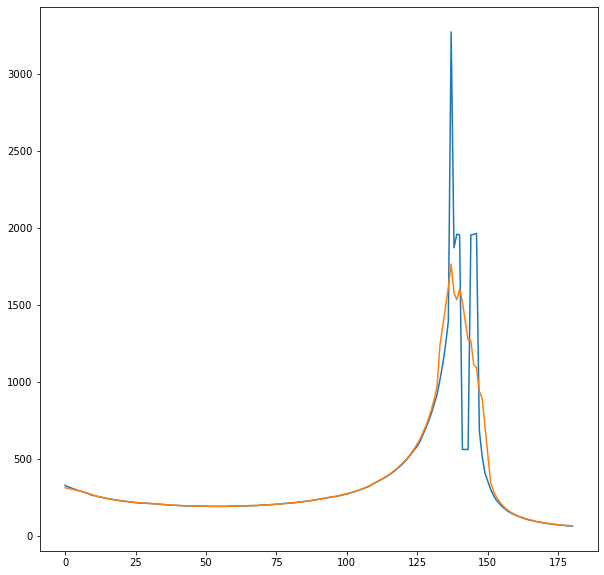

In [62]:
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.plot(median_filter(data, 5))

## Exercise 2: Ray sensor model
The goal of this exercise is to generate the probability density function for a single measurement of a LIDAR sensor.

### Part A:
Using the supplied [datasheet](data/63-9378_Rev-F_Ultra-Puck_Datasheet_Web.pdf) in the data folder, and other given parameters and ground truth plot the probability density function for the 4 cases seperately. (i.e. plot the PDF for: correct range with measurement noise, unexpected objects, failures and random measurements.

### Correct range with measurement error:

### Unexpected objects:

### Failures:

### Random measurements:

### Part B:
Combine all four of these distributions and plot the results.

12500000.0

## Exercise 3: Sensor data rates
When building a robotic sensor system it is important to consider the amount of data that you will be handling. Large amounts of data generally give the robot more ways to navigate, but this comes at a cost, not only to the processing time, but also update rates or the cost of the infrastructure, faster communications typically cost more money, and power.

### Part A: Scan rate
The same lidar system used in the previous question is to be placed on a robot that operates around a house. This robot uses a Raspberry Pi 4 as the top level controller, with the LIDAR module pluged in as a Ethernet device. Based only on the maximum connection speed and packet size of 10 bytes for a single point calculate the maximum number of points that can be recieved by the controller in one second. (Hint: make sure you know the difference between megabits per second (Mbps) and megabytes per second (MBps))




| Description | Value | 
| :---        |    :----:   |  
| Speed Raspi      | 1 Gigabit / s | 
| Packet size  | 10 bytes = 80 bit |
| Max packets / s  | 1 000 000 000 / 80 = **12 500 000**|



### Part B: Point cloud size
The Robot also has an Xbox kintect (1st Gen) for detecting and interacting with users. The xbox kinect it interfaced with using ROS and returns a sensor_msgs/PointCloud message with 640x480 points, a header size of 128bits and a single channel taking 32 bits. Using rosmsg command to help, calculate the size of one scan in bits.

**info from ros**:

```
std_msgs/Header header
  uint32 seq
  time stamp
  string frame_id
geometry_msgs/Point32[] points
  float32 x
  float32 y
  float32 z
sensor_msgs/ChannelFloat32[] channels
  string name
  float32[] values
```


| Description | Value | 
| :---        |    :----:   |  
| Size Pointcloud | 640 * 480 | 
| Each pixel | 3 * 32 |
| One scan  | 128 + 640 * 480 * 3 * 32 = 29491328 bits|



### Part C: Refresh rate
Along with the LIDAR and Xbox kinect the Robot also has a 4K webcam object recognition, but the raspberry pi does not have the processing power required to perform all the data processing on board. To combat this the Raspberry Pi streams the data over wifi to a more powerful computer. This wifi connection is not consistent though and has data rates from 300Mbps to 130Mbps depending on the location of the robot. Asumming a full scan LIDAR scan consists of 30 000 points and each webcam image is 4MB, calculate the maximum and minimum refresh rates of the full system using your answer from part B, assuming only one way communication. What are some ways of improving this refresh rate? (Hint: 1MB = 1024KB, 1KB = 1024B)